reference paper: https://www.irjet.net/archives/V7/i1/IRJET-V7I1206.pdf
Dataset taken from kaggle: https://www.kaggle.com/tbyrnes/advertising

Aim of the project:
Based on the predictors(user's features/input variables) we are predicting whether particular user clicks on the ad or not.
click-1
not clicked-0

In [153]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [154]:
#loading the dataset,read_csv is used to read the comma sepearted file
df = pd.read_csv('C:/Users/CHANDU/advertising.csv')

In [155]:
#it is used to display the first five lines of the csv file
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [156]:
#this gives the shape(rows and cols) of the dataset
df.shape

(1000, 10)

In [157]:
#info function is used to get the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [158]:
#gives the statistical information the data
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [159]:
#Data Visualization

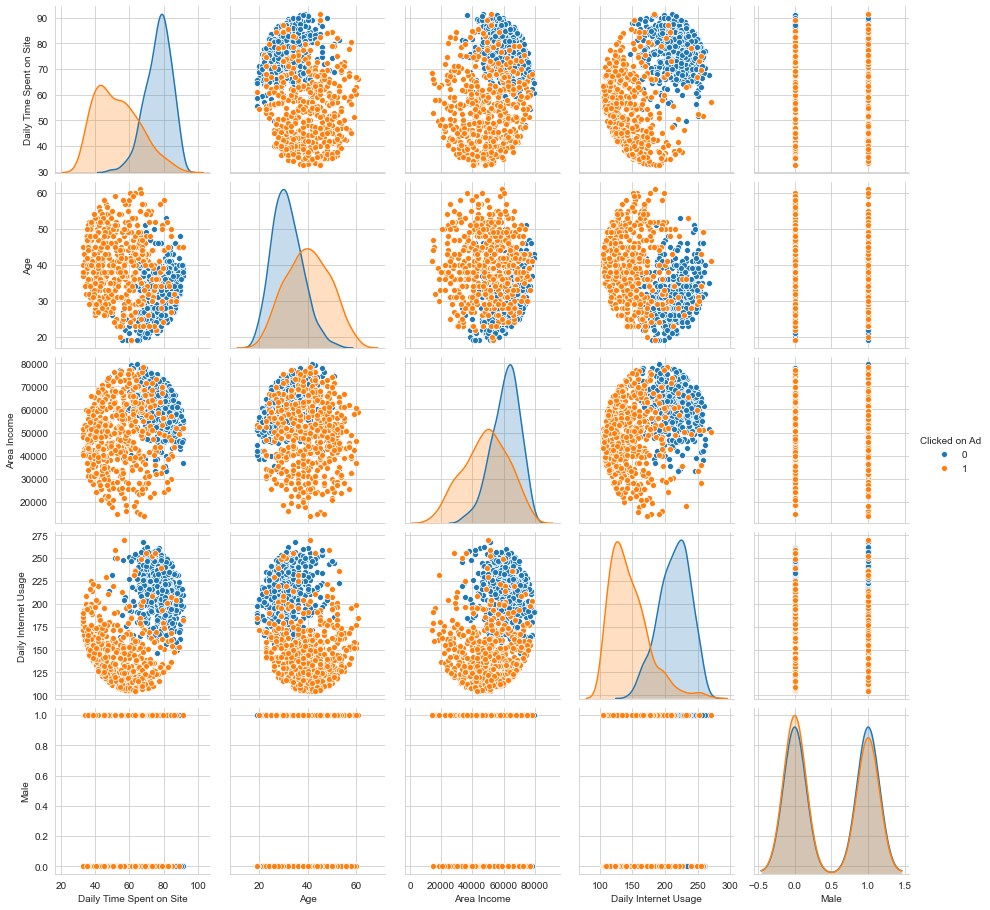

In [160]:
#to understand the relation between the different columns (features ) in our dataset we use pair plot
sns.set_style('whitegrid')
sns.pairplot(df,hue='Clicked on Ad')

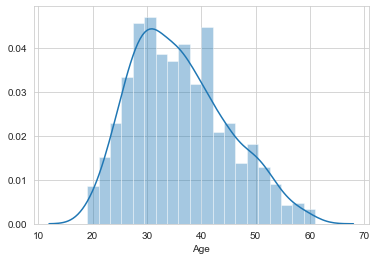

In [161]:
#distplot is used to visualize for univariant analysis throuh a histogram(we choose one particular column of the dataset)
#(KDE) is a way to estimate the probability density function of a continuous random variable)
sns.distplot(df['Age'], bins = 20, kde=True)

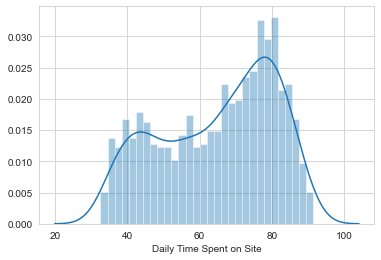

In [162]:
sns.distplot(df['Daily Time Spent on Site'],bins=30,kde=True)

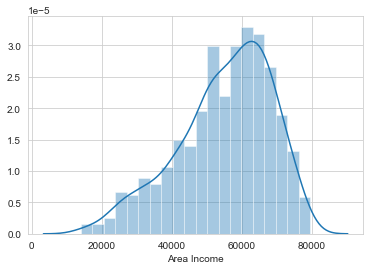

In [163]:
sns.distplot(df['Area Income'], bins = 20, kde=True)

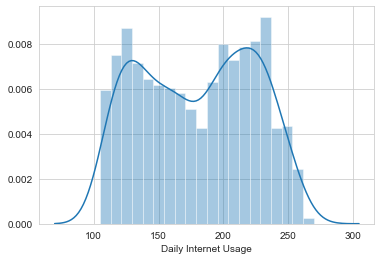

In [164]:
sns.distplot(df['Daily Internet Usage'], bins = 20, kde=True)

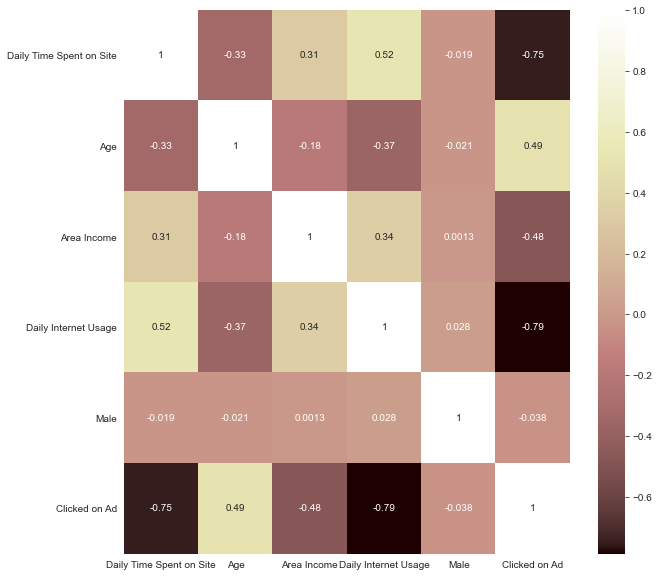

In [165]:
#to find the correlation between the variables we use heatmap
fig = plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap='pink', annot = True)

                       Data exploration and preparation:

In [166]:
#value_counts gives the count of the unique values (here we are finding the unique value count of the target variable)
df['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [167]:
#finding the count of null values in each column
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [168]:
#gives all the unique values in the column Ad Topic Line
df['Ad Topic Line'].nunique()

1000

In [169]:
#gives all the unique values in the column Ad Topic Line
df['Ad Topic Line'].unique()

array(['Cloned 5thgeneration orchestration',
       'Monitored national standardization',
       'Organic bottom-line service-desk',
       'Triple-buffered reciprocal time-frame',
       'Robust logistical utilization', 'Sharable client-driven software',
       'Enhanced dedicated support', 'Reactive local challenge',
       'Configurable coherent function',
       'Mandatory homogeneous architecture',
       'Centralized neutral neural-net',
       'Team-oriented grid-enabled Local Area Network',
       'Centralized content-based focus group',
       'Synergistic fresh-thinking array',
       'Grass-roots coherent extranet',
       'Persistent demand-driven interface',
       'Customizable multi-tasking website', 'Intuitive dynamic attitude',
       'Grass-roots solution-oriented conglomeration',
       'Advanced 24/7 productivity',
       'Object-based reciprocal knowledgebase',
       'Streamlined non-volatile analyzer',
       'Mandatory disintermediate utilization',
       'Futur

In [170]:
#in the similar way check the city
df['City'].nunique()

969

We can clearly notice that the columns  Ad Topic Line and City are having too many unique values.So having a large number of unique values will not fetch a ml(machine learning) model to set up helpful relationships.Hence these two columns will be excluded.

In [171]:
df['Country'].nunique()

237

In [172]:
#number of users belong to which country 
pd.crosstab(index=df['Country'],columns='count').sort_values(['count'], ascending=False)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
...,...
Montserrat,1
Mozambique,1
Romania,1


In [173]:
#hence  we are converting the column Country to a category, then using the category values for label encoding hence can assign the encoded variable to a new column using the cat.codes accessor: 
df['Country Cat Code']=df['Country'].astype('category').cat.codes

In [174]:
#coverting the timestamp and extracting the Month,Day_of_month,Day_of_the_week,Hour from the timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.month
df['Day_of_month'] = df['Timestamp'].dt.day
df['Day_of_the_week'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour

In [175]:
df.drop(['City','Country','Timestamp','Ad Topic Line'],axis = 1 ,inplace = True)

In [176]:
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Country Cat Code,Month,Day_of_month,Day_of_the_week,Hour
0,68.95,35,61833.90,256.09,0,0,215,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,147,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,184,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,103,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,96,6,3,4,3


In [177]:
#now sepearting the target column from the independent(ie input varibales) or Predictor variables
output_column = ['Clicked on Ad']
input_variables = list(set(list(df.columns))-set(output_column))

In [178]:
#target variable after seperating from the input variables
df[output_column]

,Clicked on Ad
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,0


In [179]:
df[input_variables]

,Daily Internet Usage,Month,Male,Country Cat Code,Age,Hour,Day_of_month,Day_of_the_week,Area Income,Daily Time Spent on Site
0,256.09,3,0,215,35,0,27,6,61833.90,68.95
1,193.77,4,1,147,31,1,4,0,68441.85,80.23
2,236.50,3,0,184,26,20,13,6,59785.94,69.47
3,245.89,1,1,103,29,2,10,6,54806.18,74.15
4,225.58,6,0,96,35,3,3,4,73889.99,68.37
...,...,...,...,...,...,...,...,...,...,...
995,208.58,2,1,116,30,21,11,3,71384.57,72.97
996,134.42,4,1,26,45,2,22,4,67782.17,51.30
997,120.37,2,1,140,51,17,1,0,42415.72,51.63
998,187.95,3,0,85,19,2,24,3,41920.79,55.55


In [180]:
## splitting the data into training and test dataset, and specifying the percentage of data to be kept in the test data
X = df[input_variables]
y = df[output_column]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=67)

In [181]:
X

,Daily Internet Usage,Month,Male,Country Cat Code,Age,Hour,Day_of_month,Day_of_the_week,Area Income,Daily Time Spent on Site
0,256.09,3,0,215,35,0,27,6,61833.90,68.95
1,193.77,4,1,147,31,1,4,0,68441.85,80.23
2,236.50,3,0,184,26,20,13,6,59785.94,69.47
3,245.89,1,1,103,29,2,10,6,54806.18,74.15
4,225.58,6,0,96,35,3,3,4,73889.99,68.37
...,...,...,...,...,...,...,...,...,...,...
995,208.58,2,1,116,30,21,11,3,71384.57,72.97
996,134.42,4,1,26,45,2,22,4,67782.17,51.30
997,120.37,2,1,140,51,17,1,0,42415.72,51.63
998,187.95,3,0,85,19,2,24,3,41920.79,55.55


In [182]:
y

,Clicked on Ad
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,0


In [183]:
###printing the shape of the training and test dataset
print(X_train.shape)
print(X_test.shape)

(750, 10)
(250, 10)


In [184]:
print(y_train.shape)
print(y_test.shape)

(750, 1)
(250, 1)


                                Logistic Regression

In [185]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
log_predicted = logistic_model.predict(X_test)

D:\INSTALLED_SOFTWARES\envs\PythonCPU\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\INSTALLED_SOFTWARES\envs\PythonCPU\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [186]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,log_predicted))

[[117   4]
 [ 16 113]]


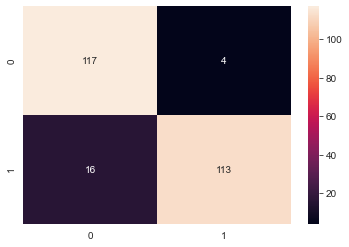

In [187]:
#visualizing the confusion matrix for logistic
cm = confusion_matrix(y_test,log_predicted)
sns.heatmap(cm, annot = True, fmt='g')

In [188]:
print(classification_report(y_test,log_predicted))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       121
           1       0.97      0.88      0.92       129

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [189]:
from sklearn.metrics import accuracy_score
logistic_accuracy = accuracy_score(y_test,log_predicted)
print(logistic_accuracy*100)

92.0


                                    DecisionTreeClassifier

In [190]:
#Applying Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
d_tree_c = DecisionTreeClassifier()
#fitting the model
d_tree_c.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [191]:
#predictions from the test data
y_dec_pred = d_tree_c.predict(X_test)

In [192]:
print(confusion_matrix(y_test,y_dec_pred))
print(classification_report(y_test,y_dec_pred))

[[116   5]
 [  6 123]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       121
           1       0.96      0.95      0.96       129

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



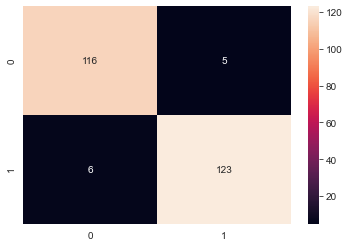

In [193]:
#visualizing the confusion matrix for logistic
cm = confusion_matrix(y_test,y_dec_pred)
sns.heatmap(cm, annot = True, fmt='g')

In [194]:
dec_tree_accuracy = accuracy_score(y_test,y_dec_pred)
print(dec_tree_accuracy*100)

95.6


                               Naive Bayes classifier 

In [195]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_gauss_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_gauss_pred))
print(classification_report(y_test,y_gauss_pred))

[[118   3]
 [  3 126]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       121
           1       0.98      0.98      0.98       129

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



D:\INSTALLED_SOFTWARES\envs\PythonCPU\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


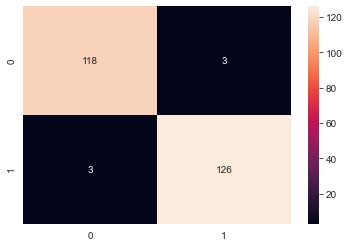

In [196]:
#visualizing the confusion matrix for logistic
cm = confusion_matrix(y_test,y_gauss_pred)
sns.heatmap(cm, annot = True, fmt='g')

In [197]:
guass_accuracy = accuracy_score(y_test,y_gauss_pred)
print(guass_accuracy*100)

97.6


                                         Support Vector Classifier

In [198]:
#scaling to improve accuracy generally we perform scaling before applying svc(Distance metric based algorithm)
#Main purpose of scaling data before to avoid some types of numerical difficulties and difference between the numerical range)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [199]:
#applying Support Vector Classifier
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
svm_predictions = model.predict(X_test)

D:\INSTALLED_SOFTWARES\envs\PythonCPU\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [200]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,svm_predictions))

[[119   2]
 [  4 125]]


In [201]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       121
           1       0.98      0.97      0.98       129

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



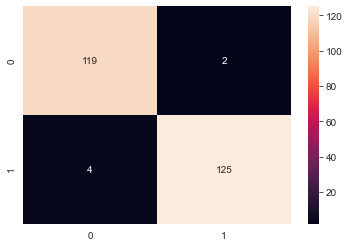

In [202]:
#visualizing the confusion matrix for logistic
cm = confusion_matrix(y_test,svm_predictions)
sns.heatmap(cm, annot = True, fmt='g')

In [203]:
svm_accuracy = accuracy_score(y_test,svm_predictions)
print(svm_accuracy*100)

97.6


From the above algorithms Support Vector Classifier and Naive Bayes Classifier performed the best with accuracy of 97.6 
Logistic performed low with an accuracy of 92.0